In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import preprocess_all_data


all_data = preprocess_all_data(pd.read_csv('data_candidates.csv', sep=';', header=None),
                               pd.read_csv('data_jobs.csv', sep=';', header=None),
                               pd.read_csv('data_candidates_education.csv', sep=';', header=None),
                               pd.read_csv('data_candidates_work_places.csv', sep=';', header=None))

mask = np.random.choice([True, False], size=len(all_data), p=[0.05, 0.95])

training_data = np.asarray(all_data[~mask][all_data.columns[:-1]])
training_labels = np.asarray(all_data[~mask]['status'])
test_data = np.asarray(all_data[mask][all_data.columns[:-1]])
test_labels = np.asarray(all_data[mask]['status'])

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(34, )),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation=tf.nn.relu)
])


model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'mse',
              metrics=['accuracy'])

In [27]:
#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
history = model.fit(training_data, training_labels, epochs=25, validation_split=0.01, batch_size=128)
model.evaluate(test_data, test_labels)

Epoch 1/25
162/162 [==============================] - 2s 7ms/step - loss: 0.1989 - accuracy: 0.7104 - val_loss: 0.1249 - val_accuracy: 0.8571
Epoch 2/25
162/162 [==============================] - 1s 5ms/step - loss: 0.1868 - accuracy: 0.7221 - val_loss: 0.1286 - val_accuracy: 0.8476
Epoch 3/25
162/162 [==============================] - 1s 6ms/step - loss: 0.1852 - accuracy: 0.7271 - val_loss: 0.1266 - val_accuracy: 0.8571
Epoch 4/25
162/162 [==============================] - 1s 7ms/step - loss: 0.1840 - accuracy: 0.7320 - val_loss: 0.1325 - val_accuracy: 0.8476
Epoch 5/25
162/162 [==============================] - 1s 6ms/step - loss: 0.1822 - accuracy: 0.7337 - val_loss: 0.1261 - val_accuracy: 0.8571
Epoch 6/25
162/162 [==============================] - 1s 6ms/step - loss: 0.1827 - accuracy: 0.7325 - val_loss: 0.1316 - val_accuracy: 0.8571
Epoch 7/25
162/162 [==============================] - 1s 6ms/step - loss: 0.1818 - accuracy: 0.7334 - val_loss: 0.1274 - val_accuracy: 0.8571
Epoch 

[0.17745383083820343, 0.7433460354804993]

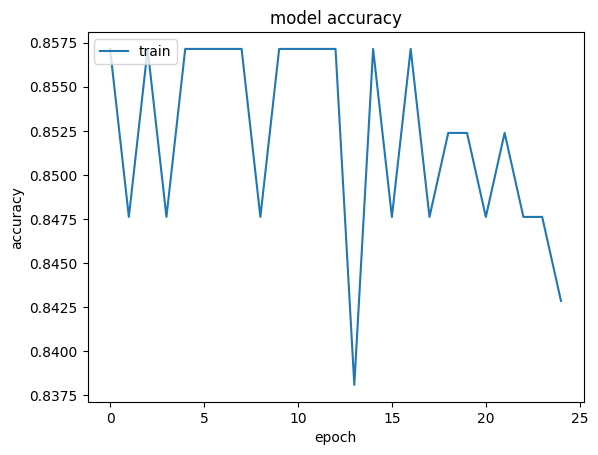

In [28]:
np.set_printoptions(suppress=True)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

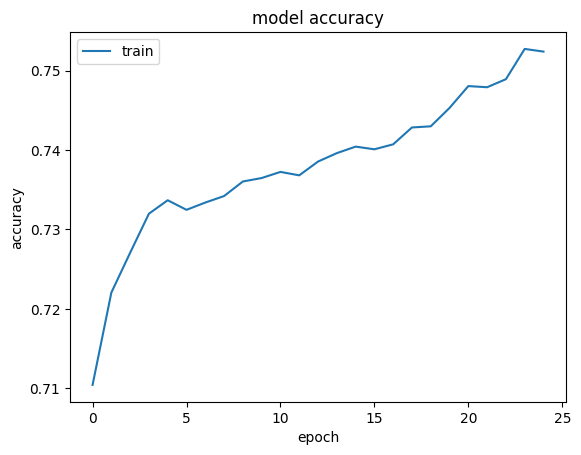

In [29]:
np.set_printoptions(suppress=True)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
max(model.predict(test_data))

33/33 [==============================] - 0s 2ms/step


array([1.0598577], dtype=float32)

In [31]:
import pandas as pd
from utils import preprocess_test_data

test_data = preprocess_test_data(pd.read_csv('test_candidates.csv', sep=';', header=None),
                               pd.read_csv('test_jobs.csv', sep=';', header=None),
                               pd.read_csv('test_candidates_education.csv', sep=';', header=None),
                               pd.read_csv('test_candidates_workplaces.csv', sep=';', header=None))



In [32]:
test_coll = list(test_data.columns)
str(test_coll)

"['id', 'sex_2', 'citiz_other', 'citiz_rf', 'lang_other', 'lang_rus', 'dl_A', 'dl_B', 'dl_C', 'dl_D', 'graf_1_Change', 'graf_1_Full', 'graf_1_Look-out', 'graf_1_Not full', 'graf_1_Part', 'graf_1_does not matter', 'graf_2_Flex', 'graf_2_Full', 'graf_2_Stage', 'graf_2_does not matter', 'age', 'salary', 'educ_col', 'educ_other', 'educ_sch', 'educ_univ', 'drive', 'mech', 'job_id', 'job_B', 'job_C', 'job_D', 'same_region']"

In [33]:
test_data['sex_1'] = test_data.sex_2.apply(lambda x: 1 if x == 0 else 0)
test_data['graf_2_Project'] = 0
test_data['graf_2_Volunteering'] = 0

In [34]:
test_data

,id,sex_2,citiz_other,citiz_rf,lang_other,lang_rus,dl_A,dl_B,dl_C,dl_D,...,drive,mech,job_id,job_B,job_C,job_D,same_region,sex_1,graf_2_Project,graf_2_Volunteering
0,8458568,1,0,1,0,1,0,0,0,0,...,0.000000,0.0,140952,1,1,0,1,0,0,0
1,8480519,1,0,1,0,1,0,1,1,1,...,0.336667,0.0,140952,1,1,0,1,0,0,0
2,8511395,1,0,1,0,1,0,0,0,0,...,0.000000,0.0,140952,1,1,0,1,0,0,0
3,8511459,1,0,1,0,1,0,0,0,0,...,0.020000,0.0,140952,1,1,0,0,0,0,0
4,8530237,1,0,1,0,1,0,1,0,0,...,1.000000,1.0,140952,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,339,0,0,1,0,1,0,0,0,0,...,0.000000,0.0,241719,0,1,0,0,1,0,0
1996,585,1,0,1,1,0,0,1,0,0,...,0.000000,0.0,241719,0,1,0,0,0,0,0
1997,616,1,0,1,1,0,0,0,0,0,...,0.000000,0.0,241719,0,1,0,0,0,0,0
1998,622,1,0,1,1,0,0,0,0,0,...,0.000000,0.0,241719,0,1,0,0,0,0,0


In [35]:

test_data = test_data[['sex_1', 'sex_2', 'citiz_other', 'citiz_rf', 'lang_other', 'lang_rus', 'dl_A', 'dl_B', 'dl_C', 'dl_D', 'graf_1_Change', 'graf_1_Full', 'graf_1_Look-out', 'graf_1_Not full', 'graf_1_Part', 'graf_1_does not matter', 'graf_2_Flex', 'graf_2_Full', 'graf_2_Project', 'graf_2_Stage', 'graf_2_Volunteering', 'graf_2_does not matter', 'age', 'salary', 'educ_col', 'educ_other', 'educ_sch', 'educ_univ', 'drive', 'mech', 'job_B', 'job_C', 'job_D', 'same_region', 'id', 'job_id']].copy()

In [48]:
from tensorflow.keras.models import load_model
def predict(x):
    model = load_model('neural_web2.h5')
    a = x[(x.job_B==0)&(x.job_C==0)&(x.job_D==0)].job_id.unique()
    out = model.predict(np.asarray(x[x.columns[:-2]]))
    x = x[['id', 'job_id']].copy()
    x['cam'] = out
    x.loc[x.job_id.isin(a), 'cam'] = 0
    return x

In [49]:
rang = predict(test_data)
rang

63/63 [==============================] - 0s 2ms/step


,id,job_id,cam
0,8458568,140952,0.229802
1,8480519,140952,0.361287
2,8511395,140952,0.254157
3,8511459,140952,0.313118
4,8530237,140952,0.000000
...,...,...,...
1995,339,241719,0.000000
1996,585,241719,0.000000
1997,616,241719,0.000000
1998,622,241719,0.000000


In [43]:
out

array([[0.22980249],
       [0.361287  ],
       [0.25415665],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [44]:
rang = test_data[['id', 'job_id']].copy()

In [45]:
rang['cam'] = out
rang

,id,job_id,cam
0,8458568,140952,0.229802
1,8480519,140952,0.361287
2,8511395,140952,0.254157
3,8511459,140952,0.313118
4,8530237,140952,0.000000
...,...,...,...
1995,339,241719,0.000000
1996,585,241719,0.000000
1997,616,241719,0.000000
1998,622,241719,0.000000


In [46]:
rang.sort_values(['job_id', 'cam'], ascending=False)

,id,job_id,cam
1814,10630143,241719,0.730069
1980,135,241719,0.554820
1875,19322997,241719,0.538986
1852,18006777,241719,0.499557
1994,338,241719,0.486287
...,...,...,...
779,134,62241,0.000000
781,136,62241,0.000000
784,147,62241,0.000000
787,154,62241,0.000000


In [61]:

l = ['sex_1', 'sex_2', 'citiz_other', 'citiz_rf', 'lang_other', 'lang_rus', 'dl_A', 'dl_B', 'dl_C', 'dl_D',
     'graf_1_Change', 'graf_1_Full', 'graf_1_Look-out', 'graf_1_Not full', 'graf_1_Part', 'graf_1_does not matter',
     'graf_2_Flex', 'graf_2_Full', 'graf_2_Project', 'graf_2_Stage', 'graf_2_Volunteering', 'graf_2_does not matter',
     'age', 'salary', 'educ_col', 'educ_other', 'educ_sch', 'educ_univ', 'drive', 'mech', 'job_B', 'job_C', 'job_D',
     'same_region', 'id', 'job_id']

data = [0]*len(l)

In [62]:
data

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [63]:
data[0] = 1

In [64]:
data

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]